# Problema a resolver

Como problema a resolver planteamos la identificación y clasificación entre 10 tipos de frutas y verduras, 5 ed cada clase. Para esto, planteamos la realización de una red neuronal convolucional.

# Librerias

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import random
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Manipulación del Dataset

In [76]:
DATADIR = "/content/drive/MyDrive/comida_dataset/Train"
DATADIR_TEST = "/content/drive/MyDrive/comida_dataset/Test"
CATEGORIES = ["Banana", "Frutilla", "Mango", "Manzana", "Morron", "Naranja", "Papa", "Pepino", "Tomate", "Zanahoria"]

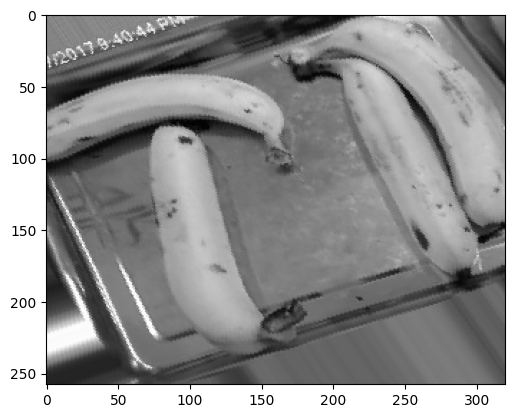

In [77]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

Primero vamos a crear img_array, donde vamos a guardar todas las imágenes de train con la ayuda de os para importar los archivos desde Drive y cv2 para leer las imágenes.

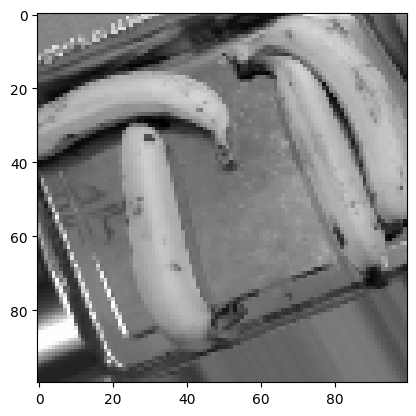

In [78]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")

Despues vamos a cambiar el tamaño de las imágenes para que sean todas del mismo.

In [84]:
training_data= []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass

create_training_data()

In [85]:
random.shuffle(training_data)

Creamos la training data ya definitiva, hacemos los 2 pasos mencionados anteriormente y como resultado obtenemos todas las imágenes modificadas de tamaño y color. Cada imágen tiene asignada la clase a la que pertenece y son agregadas a una lista. Luego mezclamos los datos.

In [86]:
X = []
y = []

for features, label in training_data:
  y.append(label)
  X.append(features)


X = np.array(X).astype(float) / 255
y = np.array(y)

Dividimos los datos en X e y para poder pasarlos al modelo, siendo "y" las clases y "X" las imágenes. Además dividimos los valores de los pixeles de las imágenes en 255, para que pasen a ser valores de entre 0 y 1, a esto se le llama normalizar los datos.

In [87]:
from keras.utils import to_categorical

num_classes = 10

y=to_categorical(y, num_classes=num_classes)

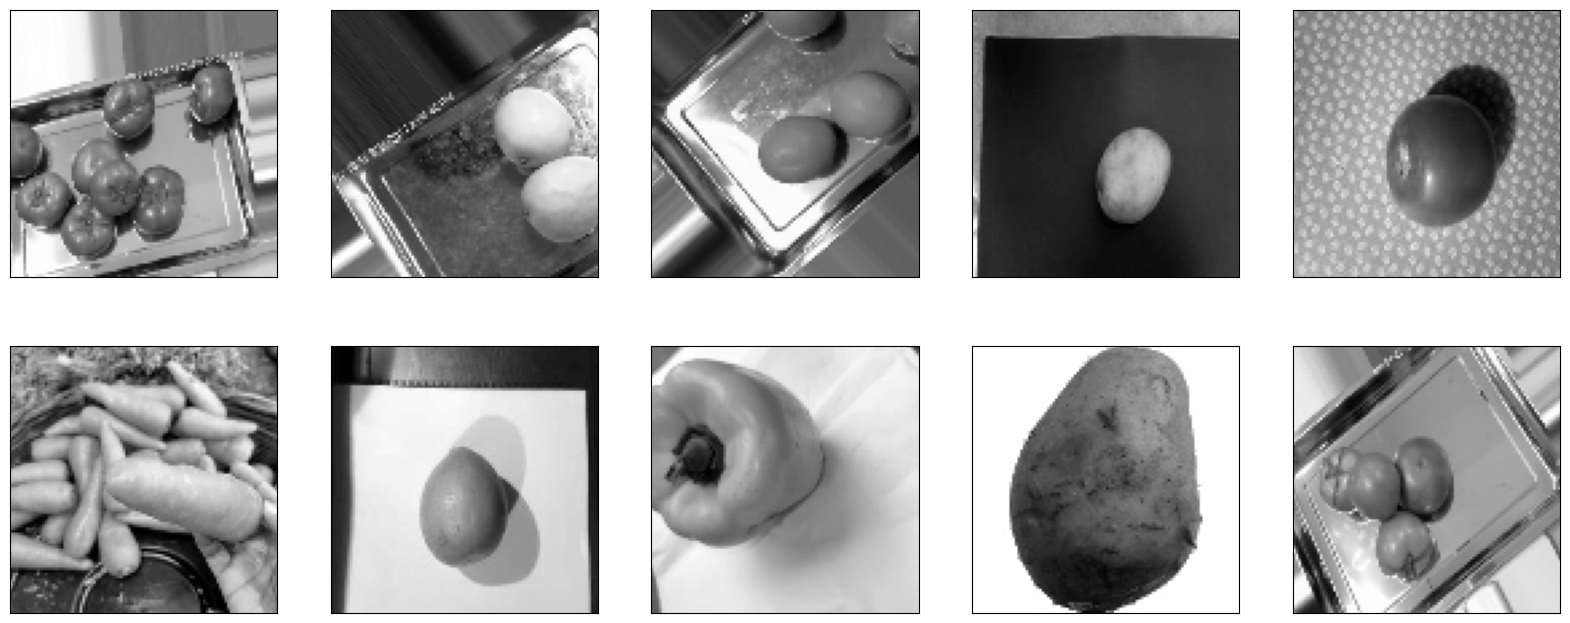

In [88]:
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

Decidimos no utilizar un método de aumento de datos ya que nuestro dataset ya contiene imágenes muy parecidas pero rotadas o modificadas sutilmente.

# Modelo

Ahora vamos a definir nuestro modelo, ¿Qué capas utilizaremos?
Para la realizacion de una red neuronal convolucional se usan 2 capas que son fundamentales, las cuales son las de Conv2D(convolucionales) y las de MaxPooling. La primera de estas es la que realiza la famosa convolución que le da nombre a este tipo de redes, pero ¿Qué es una convolución? Esta capa aplica filtros a pequeñas regiones de la imagen de entrada (en este caso de 3x3 píxeles) para detectar características como bordes, texturas, patrones, etc. A esta pequeña región se la llama núcleo o kernel y, dependiendo de los valores que nuestra red asigna automáticamente, cada capa puede aprender a detectar diferentes características.

Luego estan las capas de MaxPooling, estas capas reducen el tamaño de las características extraídas manteniendo solamente los pixeles más importantes. Esta selección la realiza quedándose con el pixel de mayor valor en una región que nosotros le indiquemos(en este caso 2x2)

Para las capas de Conv2D vamos a usar la funcion de activación relu, que hace que todos los valores menores a 0 sean convertidos a 0 y asi descartarlos. Luego, para la capa de salida usaremos la función softmax que se utiliza para que la suma total de los resultados para cada clase sea igual a uno y asi quedarse con la que mayor número nos de.
Para terminar, al modelo le agregamos una capa de dropuot, esto hace que, dependiendo el porcentaje que le asignemos, sea la porbabilidad de que una neurona funcione o no funcione. Esta técnica es normalmente utilizada para evitar el overfitteo de nuestro modelo.

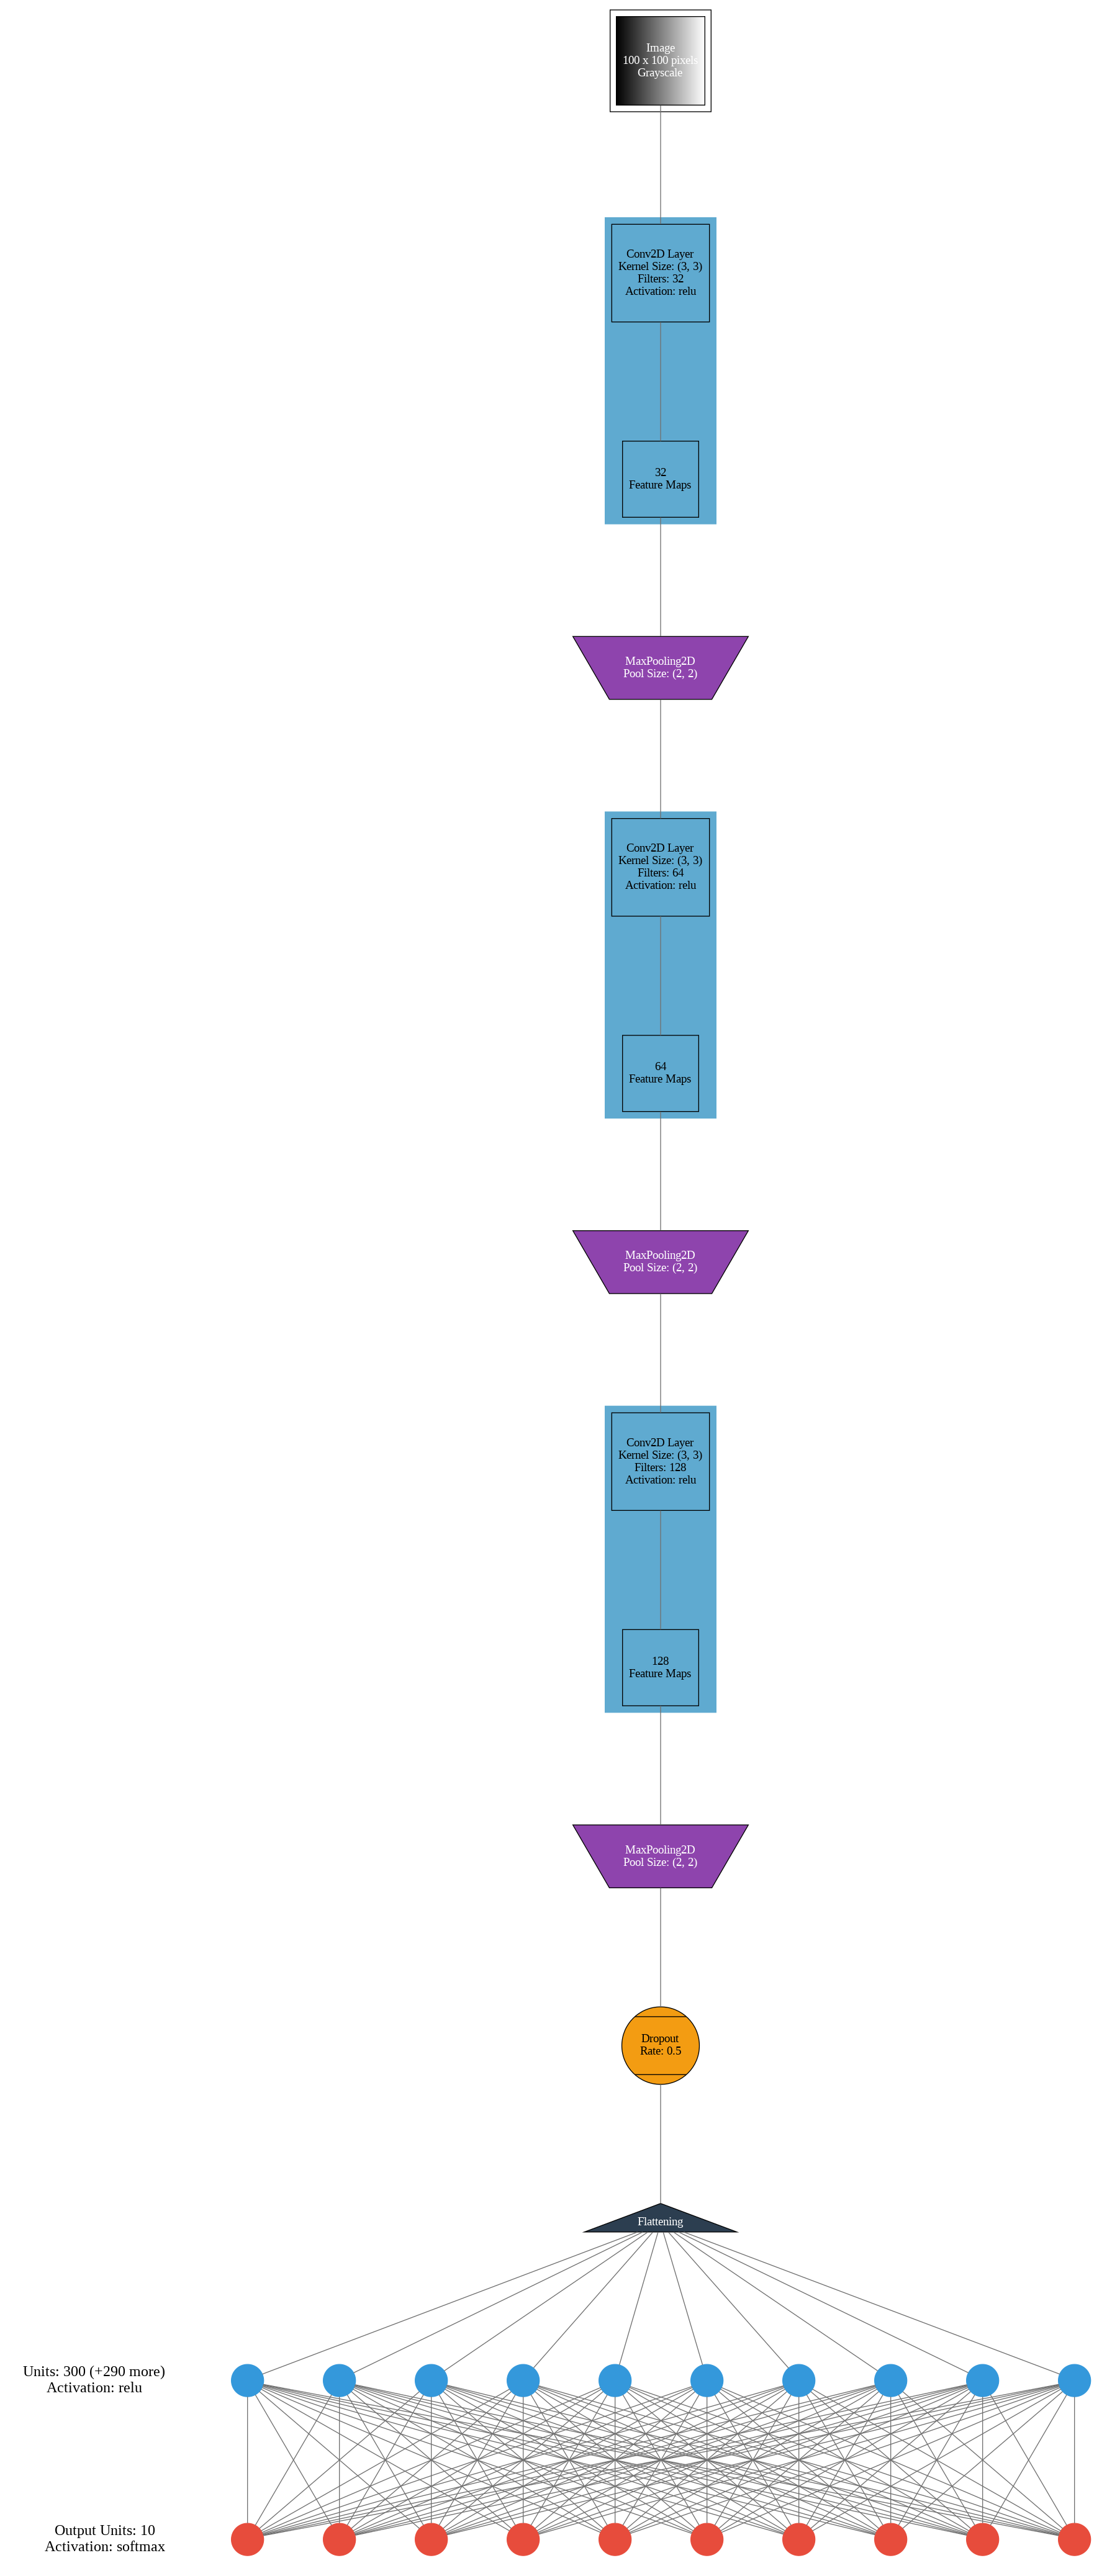

In [73]:
Image('example1.png')

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape =(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [69]:
model.compile(optimizer = "adam",
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

In [70]:
model.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=5)

Epoch 1/5
152/152 [==============================] - 94s 613ms/step - loss: 1.9006 - accuracy: 0.3282 - val_loss: 1.4608 - val_accuracy: 0.5239
Epoch 2/5
152/152 [==============================] - 96s 632ms/step - loss: 1.2615 - accuracy: 0.5884 - val_loss: 1.1089 - val_accuracy: 0.6289
Epoch 3/5
152/152 [==============================] - 92s 604ms/step - loss: 0.8540 - accuracy: 0.7200 - val_loss: 0.9242 - val_accuracy: 0.7036
Epoch 4/5
152/152 [==============================] - 94s 618ms/step - loss: 0.5857 - accuracy: 0.8076 - val_loss: 0.7953 - val_accuracy: 0.7538
Epoch 5/5
152/152 [==============================] - 93s 612ms/step - loss: 0.3774 - accuracy: 0.8787 - val_loss: 0.8037 - val_accuracy: 0.7760


In [66]:
from keras_visualizer import visualizer
from IPython.display import Image

In [72]:
visualizer(model,file_name='example1', file_format='png', view=True)

# Prueba del modelo

Por último, ahora que ya tenemos nuestro modelo, vamos a probarlo con el conjunto de test.

Primero vamos a importar las imágenes de igual manera que con el conujnto de entrenamiento

In [101]:
test_data= []

def create_test_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_TEST,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
          img_test_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
          new_test_array = cv2.resize(img_test_array, (IMG_SIZE, IMG_SIZE))
          test_data.append([new_test_array, class_num])
        except Exception as e:
          pass

create_test_data()

In [112]:
random.shuffle(test_data)

In [113]:
X_test = []
y_test = []

for features, label in test_data:
  y_test.append(label)
  X_test.append(features)

X_test = np.array(X_test).astype(float) / 255
y_test = np.array(y_test)

In [114]:
predictions = model.predict(X_test)

13/13 [==============================] - 2s 127ms/step


Ahora vamos a utilizar una función para visualizar como le fueron a estas predicciones. (La función no es nuestra, la sacamos de un repo)

In [115]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

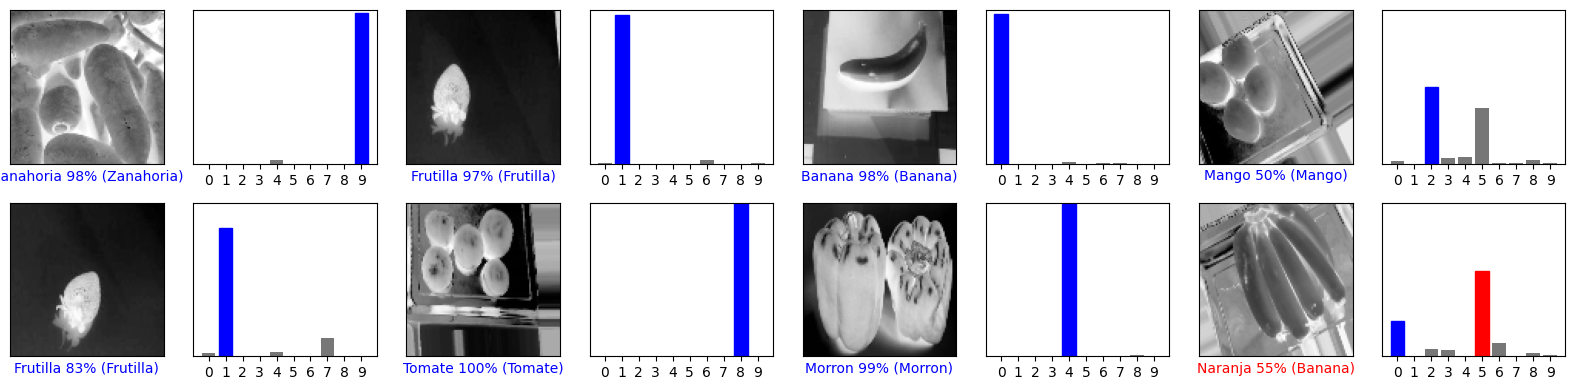

In [116]:
num_rows = 2
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()